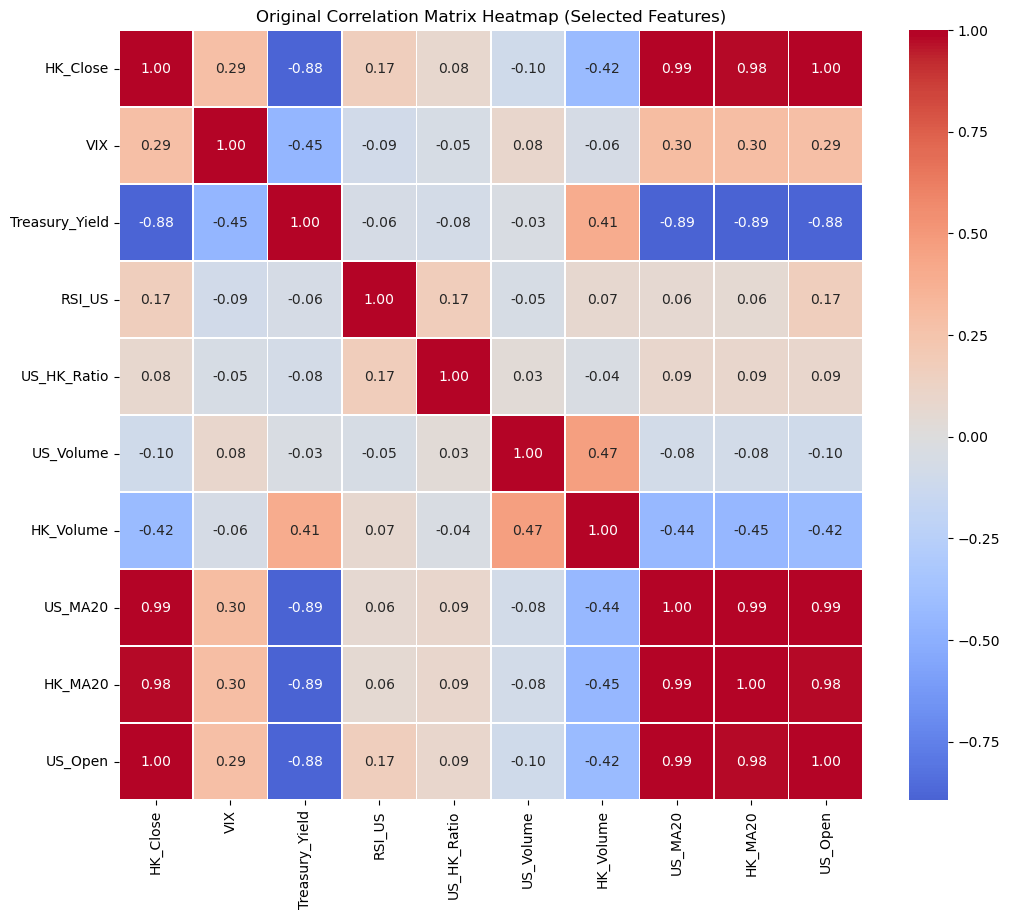

Explained Variance Ratios for Each Principal Component: [0.46938496 0.15413334 0.13637826 0.09529587 0.08469343]


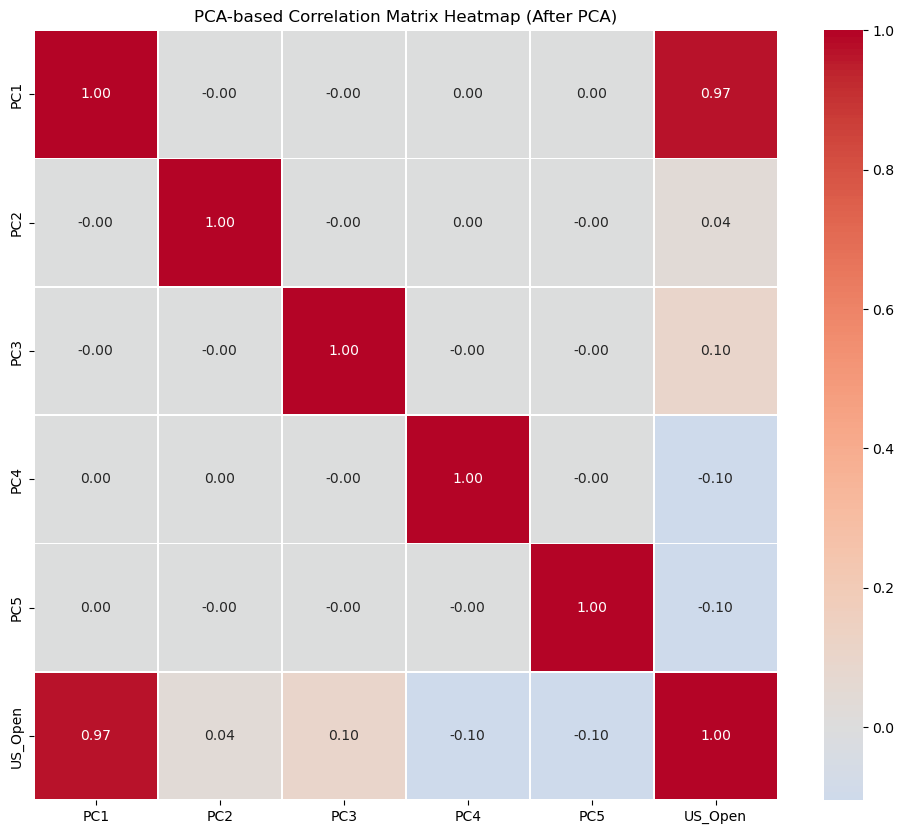

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset 
df = pd.read_csv('stock_data.csv')

# Define features and target
X = df[['HK_Close', 'VIX', 'Treasury_Yield', 'RSI_US', 'US_HK_Ratio', 'US_Volume', 'HK_Volume', 'US_MA20', 'HK_MA20']]
y = df['US_Open']

# Plot and calculate the original correlation matrix for selected features
plt.figure(figsize=(12, 10))
original_corr_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(original_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Original Correlation Matrix Heatmap (Selected Features)')
plt.show()

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios for Each Principal Component:", explained_variance)

# Combine PCA features and target into a single DataFrame for correlation analysis
data_for_corr = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
data_for_corr['US_Open'] = y

# Calculate the correlation matrix after PCA
corr_matrix = data_for_corr.corr()

# Plotting the correlation matrix heatmap after PCA
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('PCA-based Correlation Matrix Heatmap (After PCA)')
plt.show()

